# Applied Machine Learning Homework 4
Due 12/20/21 11:59PM EST

In [1]:
import re
import numpy as np
import pandas as pd
pd.set_option('display.max_colwidth', None)
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegressionCV

from wordcloud import WordCloud

### Q1: Natural Language Processing

We will train a supervised training model to predict if a tweet has a positive or negative sentiment.

#### Dataset loading & dev/test splits

1.1) Load the twitter dataset from NLTK library

In [2]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import *
from nltk.stem.porter import *

nltk.download('twitter_samples')
from nltk.corpus import twitter_samples 

[nltk_data] Downloading package twitter_samples to
[nltk_data]     /Users/vishweshwartyagi/nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!


1.2) Load the positive & negative tweets

In [3]:
all_positive_tweets = twitter_samples.strings('positive_tweets.json')
all_negative_tweets = twitter_samples.strings('negative_tweets.json')

1.3) Create a development & test split (80/20 ratio):

In [4]:
pos = ['pos' for _ in range(len(all_positive_tweets))]
neg = ['neg' for _ in range(len(all_negative_tweets))]

tweets = all_positive_tweets + all_negative_tweets
sentiments = pos + neg

df = pd.DataFrame({'Tweet': tweets, 'Sentiment':sentiments})
df = df.sample(frac = 1).reset_index(drop=True)

df.head(10)

,Tweet,Sentiment
0,"@MrLythgoe @MeatBingo Yes, and John :)",pos
1,@modern_combat I hope the hitmarker glitch is fixed soon :(,neg
2,@DanLauraCurtis Get well soon Dan. and big hugs :),pos
3,"https://t.co/Y43d1EwWTw #MadonnaMadeMTV C'mon, ur turn #MadonnaFamily #MadonnaFans :) One more time, let's all do it. Just a few tweets each",pos
4,Servus Alice Bonasio! Happy to have you in our doido's family :) Tell me what task do you want to delegate today? http://t.co/MquO7QcVqq,pos
5,@mblaq_seungh0 THEN WHY MENTION MEE OMG /envious/ please oppa eonni stop lovey dovey in front of your poor single dongsaeng :(,neg
6,Found this little guy at my store. no bigger then a dime. :) http://t.co/Rp4jrbK9eS,pos
7,@grannaHarmony fback :) indo harmos,pos
8,@fkluca but no ones as cute as u so :(,neg
9,if only you knew that the whole class was crying because of your hurtful words. :),pos


We will split after cleaning the tweets. (Done at the end of Q1.8)

#### Data preprocessing

We will do some data preprocessing before we tokenize the data. We will remove `#` symbol, hyperlinks, stop words & punctuations from the data. You can use the `re` package in python to find and replace these strings. 

1.4) Replace the `#` symbol with '' in every tweet

In [5]:
cleanText = lambda x: re.sub(r'#', '', x)
df[['Tweet']] = df.apply({'Tweet': lambda x: cleanText(x)})

df.head(10)

,Tweet,Sentiment
0,"@MrLythgoe @MeatBingo Yes, and John :)",pos
1,@modern_combat I hope the hitmarker glitch is fixed soon :(,neg
2,@DanLauraCurtis Get well soon Dan. and big hugs :),pos
3,"https://t.co/Y43d1EwWTw MadonnaMadeMTV C'mon, ur turn MadonnaFamily MadonnaFans :) One more time, let's all do it. Just a few tweets each",pos
4,Servus Alice Bonasio! Happy to have you in our doido's family :) Tell me what task do you want to delegate today? http://t.co/MquO7QcVqq,pos
5,@mblaq_seungh0 THEN WHY MENTION MEE OMG /envious/ please oppa eonni stop lovey dovey in front of your poor single dongsaeng :(,neg
6,Found this little guy at my store. no bigger then a dime. :) http://t.co/Rp4jrbK9eS,pos
7,@grannaHarmony fback :) indo harmos,pos
8,@fkluca but no ones as cute as u so :(,neg
9,if only you knew that the whole class was crying because of your hurtful words. :),pos


1.5) Replace hyperlinks with '' in every tweet

In [6]:
removeHandle = lambda x: re.sub(r'@\w*', '', x)
removelURL = lambda x: re.sub(r'http\S+', '', x)

df[['Tweet']] = df.apply({'Tweet': lambda x: removeHandle(x)})
df[['Tweet']] = df.apply({'Tweet': lambda x: removelURL(x)})

df.head(10)

,Tweet,Sentiment
0,"Yes, and John :)",pos
1,I hope the hitmarker glitch is fixed soon :(,neg
2,Get well soon Dan. and big hugs :),pos
3,"MadonnaMadeMTV C'mon, ur turn MadonnaFamily MadonnaFans :) One more time, let's all do it. Just a few tweets each",pos
4,Servus Alice Bonasio! Happy to have you in our doido's family :) Tell me what task do you want to delegate today?,pos
5,THEN WHY MENTION MEE OMG /envious/ please oppa eonni stop lovey dovey in front of your poor single dongsaeng :(,neg
6,Found this little guy at my store. no bigger then a dime. :),pos
7,fback :) indo harmos,pos
8,but no ones as cute as u so :(,neg
9,if only you knew that the whole class was crying because of your hurtful words. :),pos


1.6) Remove all stop words

In [7]:
stop_words = stopwords.words('english')

def removeStopWords(sentence):
    token_words = word_tokenize(sentence)
    stopwords_removed = [word for word in token_words if word not in stop_words]
    return ' '.join(stopwords_removed)

df[['Tweet']] = df.apply({'Tweet': lambda x: removeStopWords(x)})

df.head(10)

,Tweet,Sentiment
0,"Yes , John : )",pos
1,I hope hitmarker glitch fixed soon : (,neg
2,Get well soon Dan . big hugs : ),pos
3,"MadonnaMadeMTV C'mon , ur turn MadonnaFamily MadonnaFans : ) One time , let 's . Just tweets",pos
4,Servus Alice Bonasio ! Happy doido 's family : ) Tell task want delegate today ?,pos
5,THEN WHY MENTION MEE OMG /envious/ please oppa eonni stop lovey dovey front poor single dongsaeng : (,neg
6,Found little guy store . bigger dime . : ),pos
7,fback : ) indo harmos,pos
8,ones cute u : (,neg
9,knew whole class crying hurtful words . : ),pos


1.7) Remove all punctuations

In [8]:
cleanText = lambda x: re.sub(r'[^\w\s]', '', x)

df[['Tweet']] = df.apply({'Tweet': lambda x: cleanText(x)})

df.head(10)

,Tweet,Sentiment
0,Yes John,pos
1,I hope hitmarker glitch fixed soon,neg
2,Get well soon Dan big hugs,pos
3,MadonnaMadeMTV Cmon ur turn MadonnaFamily MadonnaFans One time let s Just tweets,pos
4,Servus Alice Bonasio Happy doido s family Tell task want delegate today,pos
5,THEN WHY MENTION MEE OMG envious please oppa eonni stop lovey dovey front poor single dongsaeng,neg
6,Found little guy store bigger dime,pos
7,fback indo harmos,pos
8,ones cute u,neg
9,knew whole class crying hurtful words,pos


1.8) Apply stemming on the development & test datasets using Porter algorithm

In [9]:
porter = PorterStemmer()

def stemSentence(sentence):
    token_words = word_tokenize(sentence)
    stem_sentence = [porter.stem(word) for word in token_words]
    return ' '.join(stem_sentence)

df[['Tweet']] = df.apply({'Tweet': lambda x: stemSentence(x)})

df.head(10)

,Tweet,Sentiment
0,ye john,pos
1,i hope hitmark glitch fix soon,neg
2,get well soon dan big hug,pos
3,madonnamademtv cmon ur turn madonnafamili madonnafan one time let s just tweet,pos
4,servu alic bonasio happi doido s famili tell task want deleg today,pos
5,then whi mention mee omg enviou pleas oppa eonni stop lovey dovey front poor singl dongsaeng,neg
6,found littl guy store bigger dime,pos
7,fback indo harmo,pos
8,one cute u,neg
9,knew whole class cri hurt word,pos


Displaying Word Cloud for Postive Tweets


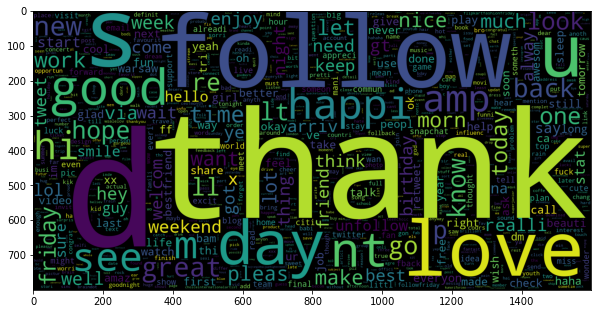

In [10]:
t = df[df.Sentiment=='pos'].drop(['Sentiment'], axis=1)

print('Displaying Word Cloud for Postive Tweets')
plt.figure(figsize = (10,10))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(t.Tweet))
plt.imshow(wc);

Displaying Word Cloud for Negative Tweets


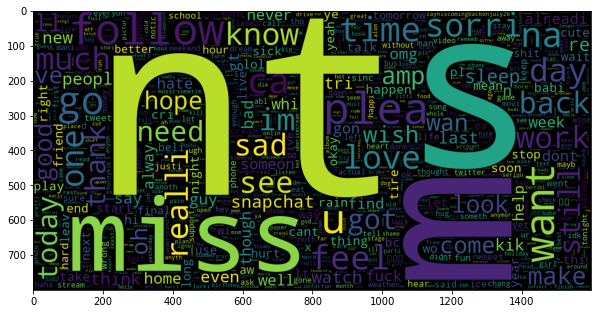

In [11]:
t = df[df.Sentiment=='neg'].drop(['Sentiment'], axis=1)

print('Displaying Word Cloud for Negative Tweets')
plt.figure(figsize = (10,10))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(t.Tweet))
plt.imshow(wc);

In [12]:
df.head()

,Tweet,Sentiment
0,ye john,pos
1,i hope hitmark glitch fix soon,neg
2,get well soon dan big hug,pos
3,madonnamademtv cmon ur turn madonnafamili madonnafan one time let s just tweet,pos
4,servu alic bonasio happi doido s famili tell task want deleg today,pos


In [13]:
y = df.Sentiment
df.drop(['Sentiment'], axis=1, inplace=True)

df.head()

,Tweet
0,ye john
1,i hope hitmark glitch fix soon
2,get well soon dan big hug
3,madonnamademtv cmon ur turn madonnafamili madonnafan one time let s just tweet
4,servu alic bonasio happi doido s famili tell task want deleg today


In [14]:
text_dev, text_test, y_dev, y_test = train_test_split(df, y, test_size=.2, random_state=64)

print(y_dev.value_counts(), '\n')
print(y_test.value_counts())

pos    4012
neg    3988
Name: Sentiment, dtype: int64 

neg    1012
pos     988
Name: Sentiment, dtype: int64


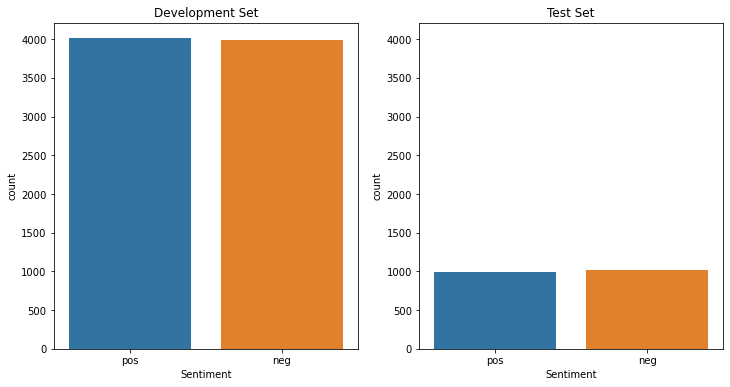

In [15]:
fig, ax = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(12, 6))

sns.countplot(x=y_dev, order=['pos', 'neg'], ax=ax[0])
sns.countplot(x=y_test, order=['pos', 'neg'], ax=ax[1])

ax[0].set_title('Development Set')
ax[1].set_title('Test Set')
ax[1].yaxis.set_tick_params(labelbottom=True)

#### Model training

1.9) Create bag of words features for each tweet in the development dataset

In [16]:
cv = CountVectorizer()
X_dev_cv = cv.fit_transform(text_dev.Tweet)

1.10) Train a supervised learning model of choice on the development dataset

In [17]:
lr_cv = LogisticRegressionCV(cv=10, max_iter=10000)
lr_cv.fit(X_dev_cv, y_dev)

LogisticRegressionCV(cv=10, max_iter=10000)

1.11) Create TF-IDF features for each tweet in the development dataset

In [18]:
tf = TfidfVectorizer()
X_dev_tf = tf.fit_transform(text_dev.Tweet)

1.12) Train the same supervised learning algorithm on the development dataset with TF-IDF features

In [19]:
lr_tf = LogisticRegressionCV(cv=10, max_iter=10000)
lr_tf.fit(X_dev_tf, y_dev)

LogisticRegressionCV(cv=10, max_iter=10000)

1.13) Compare the performance of the two models on the test dataset

In [20]:
print('Performance using Bag of Words:')
X_test_cv = cv.transform(text_test.Tweet)
lr_cv.score(X_test_cv, y_test)

Performance using Bag of Words:


0.7515

In [21]:
print('Performance using Tfidf:')
X_test_tf = tf.transform(text_test.Tweet)
lr_tf.score(X_test_tf, y_test)

Performance using Tfidf:


0.7605

We can notice a slight improvement in Tfidf method over Bag of Words.